In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

In [2]:
data = pd.read_csv('onehot_sample.csv')
data.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation'],
      dtype='object')

In [55]:
'''
=============================================================
전체 데이터
============================================================
'''

train = pd.read_csv('num_booking_status.csv')
#no_of_adults,no_of_children,avg_price_per_room 특징만 고려
feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                 'no_of_week_nights', 'required_car_parking_space',
                 'lead_time', 'repeated_guest',
                 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                 'avg_price_per_room', 'no_of_special_requests']
X = train[feature_names]
y = train["booking_status"]

# loss function을 통해서 test_size는 0.2로 선택
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 20),
                        max_iter = 300, activation = 'relu',
                        solver = 'adam', batch_size = 128, learning_rate = 'adaptive')
n_splits = 20
k_folds = KFold(n_splits = n_splits)
# scores = cross_val_score(mlp_model, X, y, cv=k_folds)
scores = cross_val_score(mlp_model, X_train, y_train, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.78346457 0.78248031 0.8011811  0.80314961 0.79527559 0.80314961
 0.79724409 0.76574803 0.78740157 0.79232283 0.79527559 0.78543307
 0.80610236 0.79507389 0.8        0.80689655 0.7862069  0.7773399
 0.79014778 0.77241379]
Average CV Score:  0.7913153582095341
Number of CV Scores used in Average:  20


In [56]:
mlp_model.fit(X_train, y_train)

MLPClassifier(batch_size=128, hidden_layer_sizes=(10, 20),
              learning_rate='adaptive', max_iter=300)

In [57]:
y_pred = mlp_model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.79


In [70]:
'''
=============================================================
outlier 제거
============================================================
'''
train = pd.read_csv('num_booking_status.csv')
outlier = len(train) * 0.025
train = train.loc[outlier:len(train)-outlier, :]
#no_of_adults,no_of_children,avg_price_per_room 특징만 고려
feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                 'no_of_week_nights', 'required_car_parking_space',
                 'lead_time', 'repeated_guest',
                 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                 'avg_price_per_room', 'no_of_special_requests']
X = train[feature_names]
y = train["booking_status"]

# loss function을 통해서 test_size는 0.2로 선택
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.25)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 20),
                        max_iter = 300, activation = 'relu',
                        solver = 'adam', batch_size = 128, learning_rate = 'adaptive')
n_splits = 20
k_folds = KFold(n_splits = n_splits)
# scores = cross_val_score(mlp_model, X, y, cv=k_folds)
scores = cross_val_score(mlp_model, X_train, y_train, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Cross Validation Scores:  [0.76685083 0.77348066 0.77458564 0.79889503 0.80110497 0.78121547
 0.78232044 0.81325967 0.79116022 0.80441989 0.82099448 0.77237569
 0.75995575 0.80752212 0.7909292  0.79424779 0.78650442 0.80641593
 0.80088496 0.7909292 ]
Average CV Score:  0.7909026181978194
Number of CV Scores used in Average:  20
Accuracy: 0.79


In [66]:
train_sizes = [1, 1000, 2000, 5000, 7000, 8000]
# train_sizes = [1, 100, 200, 500, 700, 800]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = mlp_model,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 10,
scoring = 'neg_mean_squared_error')

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\

Training scores:

 [[-0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.213      -0.207      -0.2        -0.217      -0.213      -0.214
  -0.224      -0.222      -0.22       -0.227     ]
 [-0.214      -0.207      -0.214      -0.2        -0.2255     -0.2275
  -0.2265     -0.2375     -0.209      -0.2085    ]
 [-0.2366     -0.204      -0.196      -0.1996     -0.2164     -0.214
  -0.2098     -0.2186     -0.2106     -0.2136    ]
 [-0.21842857 -0.21314286 -0.20542857 -0.20971429 -0.20414286 -0.19714286
  -0.22328571 -0.21342857 -0.216      -0.19914286]
 [-0.208875   -0.207      -0.239875   -0.1975     -0.213      -0.2055
  -0.199375   -0.202      -0.22575    -0.208625  ]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.67357513 -0.32642487 -0.32642487 -0.32642487 -0.32642487 -0.32642487
  -0.32642487 -0.32694301 -0.32659409 -0.32659409]
 [-0.24455959 -0.22694301 -0.2186528

In [67]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
1000    0.215700
2000    0.216950
5000    0.211920
7000    0.209986
8000    0.210750
dtype: float64

 --------------------

Mean validation scores

 1       0.361226
1000    0.236451
2000    0.230542
5000    0.214945
7000    0.218002
8000    0.216656
dtype: float64


(0.0, 1.0)

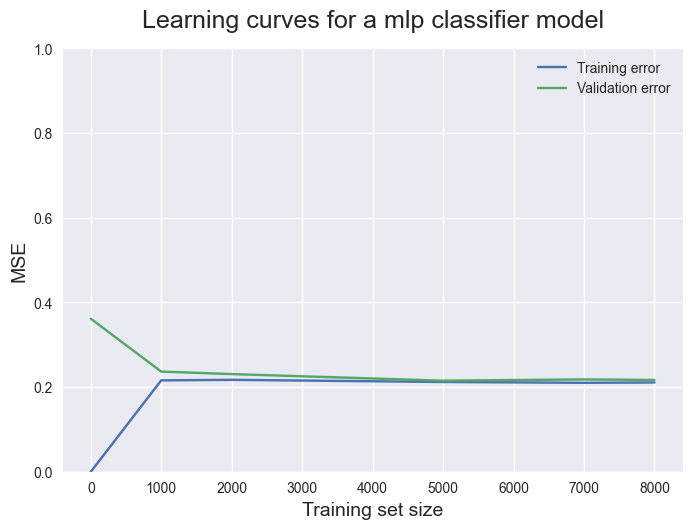

In [68]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a mlp classifier model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0, 1)

In [75]:
'''
=============================================================
lead_time 정규화 -> 별로
=============================================================
'''
train = pd.read_csv('num_booking_status.csv')
train['lead_time_norm'] = train['lead_time'].map(np.sqrt)
feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                 'no_of_week_nights', 'required_car_parking_space',
                 'lead_time', 'repeated_guest',
                 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                 'avg_price_per_room', 'no_of_special_requests']
X = train[feature_names]
y = train["booking_status"]

# loss function을 통해서 test_size는 0.2로 선택
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.25)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 20),
                        max_iter = 300, activation = 'relu',
                        solver = 'adam', batch_size = 128, learning_rate = 'adaptive')
n_splits = 10
k_folds = KFold(n_splits = n_splits)
# scores = cross_val_score(mlp_model, X, y, cv=k_folds)
scores = cross_val_score(mlp_model, X_train, y_train, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Cross Validation Scores:  [0.80167891 0.80062959 0.78174187 0.79748164 0.78256303 0.77521008
 0.79831933 0.80357143 0.81197479 0.80042017 0.82563025 0.77415966
 0.78361345 0.78886555 0.78781513 0.78256303 0.79411765 0.79306723
 0.79411765 0.78991597]
Average CV Score:  0.7933728186972587
Number of CV Scores used in Average:  20
Accuracy: 0.78


In [78]:
'''
=============================================================
cate to num
=============================================================
'''
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('conti_to_onehot_train.csv')
feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space',
       'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 
       'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation',
       'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4']
X = train[feature_names]
y = train["booking_status"]

# loss function을 통해서 test_size는 0.2로 선택
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state = 42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100),
                          max_iter=300, activation='relu',
                          solver='adam', batch_size=128, learning_rate='adaptive')
n_splits = 10
k_folds = KFold(n_splits=n_splits)
# scores = cross_val_score(mlp_model, X, y, cv=k_folds)
scores = cross_val_score(mlp_model, X_train, y_train, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Cross Validation Scores:  [0.67769029 0.59790026 0.73333333 0.64146982 0.80042017 0.66228992
 0.79779412 0.32668067 0.74054622 0.50052521]
Average CV Score:  0.6478650003308409
Number of CV Scores used in Average:  10


In [ ]:
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(100,1), (100,2), (100,3)],
'alpha': [10.0 ** -np.arange(1, 7)],
'activation': ["logistic", "relu", "Tanh"]
}

mlp_model = gridSearchCV(estimator=MLPClassifier,param_grid=parameters,n_jobs=-1,verbose=2,cv=10)

In [ ]:
mlp_model.fit(X_train, y_train)




In [ ]:
y_pred = mlp_model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

In [69]:
real_test = pd.read_csv('test.csv')

feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                 'no_of_week_nights', 'required_car_parking_space',
                 'lead_time', 'repeated_guest',
                 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                 'avg_price_per_room', 'no_of_special_requests']
test = real_test[feature_names]
y_pred = mlp_model.predict(test)

sample = pd.DataFrame()
sample['Booking_ID'] = real_test['Booking_ID']
sample['booking_status'] = y_pred
sample.to_csv('sample.csv', index = False)
sample

,Booking_ID,booking_status
0,INN04969,0
1,INN34541,0
2,INN36109,0
3,INN01554,0
4,INN24975,0
...,...,...
10878,INN29686,0
10879,INN01107,0
10880,INN06811,0
10881,INN27777,1
